In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# TRX-USD

In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/HK6_2022-2023/IS403.N22.HTCL - Phân tích dữ liệu kinh doanh/IS403_Team15/Project/Dataset/TRX-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,0.002241,0.002247,0.002057,0.002118,0.002118,6294070
1,2017-12-02,0.002110,0.002212,0.002032,0.002073,0.002073,5760180
2,2017-12-03,0.002080,0.002204,0.002034,0.002116,0.002116,7261200
3,2017-12-04,0.002124,0.002169,0.002049,0.002144,0.002144,10447300
4,2017-12-05,0.002139,0.002184,0.002058,0.002085,0.002085,8749920
...,...,...,...,...,...,...,...
2012,2023-06-05,0.081479,0.081775,0.077540,0.078347,0.078347,256099265
2013,2023-06-06,0.078347,0.079165,0.077531,0.078234,0.078234,244259894
2014,2023-06-07,0.078230,0.078808,0.076411,0.076741,0.076741,218146752
2015,2023-06-08,0.076742,0.077959,0.076245,0.077495,0.077495,160011052


In [5]:
# Chọn các cột cần thiết
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna() # Loại bỏ các giá trị bị thiếu
df = df.reset_index(drop=True) # Đặt lại chỉ số

<ipython-input-5-4e2f5a330610>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


## Tỉ lệ 7:2:1


In [6]:
# Tách dữ liệu thành tập huấn luyện, tập kiểm tra và tập xác thực
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [7]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm số láng giềng phù hợp
best_k = None
best_rmse = float('inf')

for k in range(1, 21):
    # Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)

    # Dự đoán giá trị cho tập xác thực
    x_val = np.array(val_data.index).reshape(-1, 1)
    y_val = np.array(val_data['Close'])
    y_pred_val = model.predict(x_val)

    # Tính toán RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

    # In số láng giềng và RMSE
    print(f"Number of neighbors: {k}, RMSE: {rmse}")

    # Lưu lại số láng giềng và RMSE tốt nhất
    if rmse < best_rmse:
        best_k = k
        best_rmse = rmse

        # Dự đoán giá trị cho tập kiểm tra
        x_test = np.array(test_data.index).reshape(-1, 1)
        y_test = np.array(test_data['Close'])
        y_pred = model.predict(x_test)

# In số láng giềng và RMSE tốt nhất
print('Best k:', best_k)
print('Best RMSE:', best_rmse)

Number of neighbors: 1, RMSE: 0.03413849942542834
Number of neighbors: 2, RMSE: 0.03442462096019018
Number of neighbors: 3, RMSE: 0.03618968823674041
Number of neighbors: 4, RMSE: 0.03580063975886765
Number of neighbors: 5, RMSE: 0.035145608093124454
Number of neighbors: 6, RMSE: 0.03471037188122679
Number of neighbors: 7, RMSE: 0.03449201980729823
Number of neighbors: 8, RMSE: 0.03400170353079053
Number of neighbors: 9, RMSE: 0.03378038630481457
Number of neighbors: 10, RMSE: 0.03347130667112212
Number of neighbors: 11, RMSE: 0.03331648123136321
Number of neighbors: 12, RMSE: 0.032756550853014106
Number of neighbors: 13, RMSE: 0.032022623497571366
Number of neighbors: 14, RMSE: 0.031199867186139763
Number of neighbors: 15, RMSE: 0.030677791688473132
Number of neighbors: 16, RMSE: 0.030320523711329397
Number of neighbors: 17, RMSE: 0.03017464396870991
Number of neighbors: 18, RMSE: 0.030133767249638434
Number of neighbors: 19, RMSE: 0.030448162069370125
Number of neighbors: 20, RMSE: 0

In [8]:
# last_price = df['Close'].iloc[-1]
# print('Last Price:', last_price)

# # In kết quả dự đoán 30 ngày tiếp theo
# print('Predicted closing prices for the next 30 days:')
# for i, price in enumerate(y_next_30_days):
#     print(f"Day {i+1}: {price}")

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính toán MAE và RMSE cho tập validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Tính toán MAE và RMSE cho tập testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Tính toán MAPE cho tập validation và testing
mape_val = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# In kết quả
print('Validation MAE:', mae_val)
print('Validation RMSE:', rmse_val)
print('Validation MAPE:', mape_val)

print('Testing MAE:', mae_test)
print('Testing RMSE:', rmse_test)
print('Testing MAPE:', mape_test)


Validation MAE: 0.02980946735318364
Validation RMSE: 0.030710226974955582
Validation MAPE: 48.70719467344359
Testing MAE: 0.023741703400368328
Testing RMSE: 0.025661434881072427
Testing MAPE: 36.380131801428305


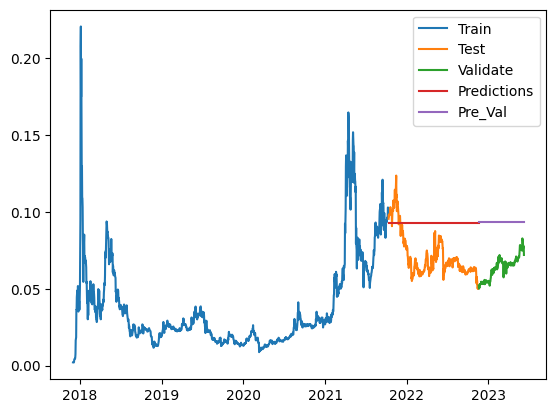

In [10]:
# Vẽ đồ thị
fig, ax = plt.subplots()
ax.plot(train_data['Date'], train_data['Close'])
ax.plot(test_data['Date'], test_data['Close'])
ax.plot(val_data['Date'], val_data['Close'])
ax.plot(test_data['Date'], y_pred)
ax.plot(val_data['Date'], y_pred_val)
ax.legend(['Train', 'Test', 'Validate', 'Predictions', 'Pre_Val'])

## Tỉ lệ 5:3:2

In [11]:
# Tách dữ liệu thành tập huấn luyện, tập kiểm tra và tập xác thực
train_size1 = int(0.5 * len(df))
test_size1 = int(0.3 * len(df))
val_size1 = len(df) - train_size1 - test_size1

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

# Quá trình Training
x_train1 = np.array(train_data1.index).reshape(-1, 1)
y_train1 = np.array(train_data1['Close'])

In [12]:
# Tìm số láng giềng phù hợp
best_k1 = None
best_rmse1 = float('inf')

for k1 in range(1, 21):
    # Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k1)
    model.fit(x_train1, y_train1)

    # Dự đoán giá trị cho tập xác thực
    x_val1 = np.array(val_data1.index).reshape(-1, 1)
    y_val1 = np.array(val_data1['Close'])
    y_pred_val1 = model.predict(x_val1)

    # Tính toán RMSE
    rmse1 = np.sqrt(mean_squared_error(y_val1, y_pred_val1))

    # In số láng giềng và RMSE
    print(f"Number of neighbors: {k1}, RMSE: {rmse1}")

    # Lưu lại số láng giềng và RMSE tốt nhất
    if rmse1 < best_rmse1:
        best_k1 = k1
        best_rmse1 = rmse1

# Xây dựng mô hình KNN với số láng giềng tốt nhất
model = KNeighborsRegressor(n_neighbors=best_k1)
model.fit(x_train1, y_train1)

# Dự đoán giá trị cho tập kiểm tra
x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1['Close'])
y_pred1 = model.predict(x_test1)

# Dự đoán giá trị cho 30 ngày tiếp theo
last_index1 = df.index[-1]
last_data1 = pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D')
x_next1_30_days = np.array(range(last_index1+1, last_index1+31)).reshape(-1, 1)
y_next1_30_days = model.predict(x_next1_30_days)

# In số láng giềng và RMSE tốt nhất
print('Best k:', best_k1)
print('Best RMSE:', best_rmse1)

Number of neighbors: 1, RMSE: 0.02517209102630543
Number of neighbors: 2, RMSE: 0.028405623267302813
Number of neighbors: 3, RMSE: 0.029457417341167805
Number of neighbors: 4, RMSE: 0.031257558753121584
Number of neighbors: 5, RMSE: 0.0327972508801417
Number of neighbors: 6, RMSE: 0.03413704026739299
Number of neighbors: 7, RMSE: 0.03524319499452217
Number of neighbors: 8, RMSE: 0.036181613508104594
Number of neighbors: 9, RMSE: 0.03684189657353965
Number of neighbors: 10, RMSE: 0.037430733587854786
Number of neighbors: 11, RMSE: 0.03773187600345659
Number of neighbors: 12, RMSE: 0.03803991415634614
Number of neighbors: 13, RMSE: 0.038248002746610124
Number of neighbors: 14, RMSE: 0.0384838341370732
Number of neighbors: 15, RMSE: 0.038478921862377315
Number of neighbors: 16, RMSE: 0.03853640265283358
Number of neighbors: 17, RMSE: 0.03845641084205074
Number of neighbors: 18, RMSE: 0.03829897840970332
Number of neighbors: 19, RMSE: 0.038270670267796146
Number of neighbors: 20, RMSE: 0.0

In [13]:
# # In kết quả dự đoán 30 ngày tiếp theo
# print('Predicted closing prices for the next 30 days:')
# for i1, price1 in enumerate(y_next_30_days):
#     print(f"Day {i1+1}: {price1}")

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính toán MAE và RMSE cho tập validation
mae_val1 = mean_absolute_error(y_val1, y_pred_val1)
rmse_val1 = np.sqrt(mean_squared_error(y_val1, y_pred_val1))

# Tính toán MAE và RMSE cho tập testing
mae_test1 = mean_absolute_error(y_test1, y_pred1)
rmse_test1 = np.sqrt(mean_squared_error(y_test1, y_pred1))

# Tính toán MAPE cho tập validation và testing
mape_val1 = np.mean(np.abs((y_val1 - y_pred_val1) / y_val1)) * 100
mape_test1 = np.mean(np.abs((y_test1 - y_pred1) / y_test1)) * 100

# In kết quả
print('Validation MAE:', mae_val1)
print('Validation RMSE:', rmse_val1)
print('Validation MAPE:', mape_val1)

print('Testing MAE:', mae_test1)
print('Testing RMSE:', rmse_test1)
print('Testing MAPE:', mape_test1)


Validation MAE: 0.03764403745863994
Validation RMSE: 0.03839255196287515
Validation MAPE: 57.166925982166696
Testing MAE: 0.03208812287400578
Testing RMSE: 0.03982729789684026
Testing MAPE: 44.58124565279497


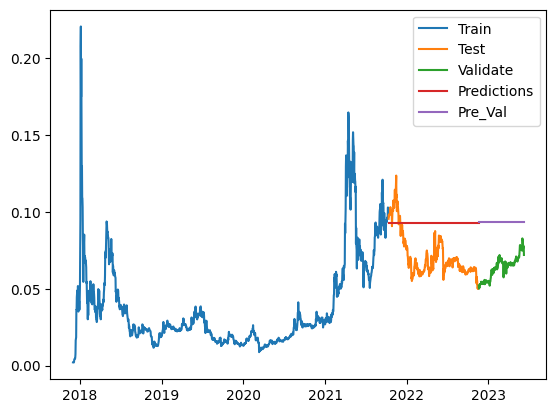

In [15]:
fig, ax = plt.subplots()
ax.plot(train_data['Date'], train_data['Close'])
ax.plot(test_data['Date'], test_data['Close'])
ax.plot(val_data['Date'], val_data['Close'])
ax.plot(test_data['Date'], y_pred)
ax.plot(val_data['Date'], y_pred_val)
ax.legend(['Train', 'Test', 'Validate', 'Predictions', 'Pre_Val'])

## Tỉ lệ 6:2:2


In [16]:
# Tách dữ liệu thành tập huấn luyện, tập kiểm tra và tập xác thực
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [17]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm số láng giềng phù hợp
best_k = None
best_rmse = float('inf')

for k in range(1, 21):
    # Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)

    # Dự đoán giá trị cho tập xác thực
    x_val = np.array(val_data.index).reshape(-1, 1)
    y_val = np.array(val_data['Close'])
    y_pred_val = model.predict(x_val)

    # Tính toán RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

    # In số láng giềng và RMSE
    print(f"Number of neighbors: {k}, RMSE: {rmse}")

    # Lưu lại số láng giềng và RMSE tốt nhất
    if rmse < best_rmse:
        best_k = k
        best_rmse = rmse

        # Dự đoán giá trị cho tập kiểm tra
        x_test = np.array(test_data.index).reshape(-1, 1)
        y_test = np.array(test_data['Close'])
        y_pred = model.predict(x_test)

# In số láng giềng và RMSE tốt nhất
print('Best k:', best_k)
print('Best RMSE:', best_rmse)

Number of neighbors: 1, RMSE: 0.011842070792888276
Number of neighbors: 2, RMSE: 0.010817372431970932
Number of neighbors: 3, RMSE: 0.010279685708408955
Number of neighbors: 4, RMSE: 0.009464286263620716
Number of neighbors: 5, RMSE: 0.00927599697374301
Number of neighbors: 6, RMSE: 0.009375613274578113
Number of neighbors: 7, RMSE: 0.00991433996448802
Number of neighbors: 8, RMSE: 0.010228860963143054
Number of neighbors: 9, RMSE: 0.01069056541703803
Number of neighbors: 10, RMSE: 0.011182105881974175
Number of neighbors: 11, RMSE: 0.011566577460874224
Number of neighbors: 12, RMSE: 0.011797165362131807
Number of neighbors: 13, RMSE: 0.012161330601264547
Number of neighbors: 14, RMSE: 0.012395899417538445
Number of neighbors: 15, RMSE: 0.01260074776519725
Number of neighbors: 16, RMSE: 0.012698132804688478
Number of neighbors: 17, RMSE: 0.01280150332840949
Number of neighbors: 18, RMSE: 0.012942964805792198
Number of neighbors: 19, RMSE: 0.013131832708519421
Number of neighbors: 20, R

In [18]:
# last_price = df['Close'].iloc[-1]
# print('Last Price:', last_price)

# # In kết quả dự đoán 30 ngày tiếp theo
# print('Predicted closing prices for the next 30 days:')
# for i, price in enumerate(y_next_30_days):
#     print(f"Day {i+1}: {price}")

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính toán MAE và RMSE cho tập validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Tính toán MAE và RMSE cho tập testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Tính toán MAPE cho tập validation và testing
mape_val = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# In kết quả
print('Validation MAE:', mae_val)
print('Validation RMSE:', rmse_val)
print('Validation MAPE:', mape_val)

print('Testing MAE:', mae_test)
print('Testing RMSE:', rmse_test)
print('Testing MAPE:', mape_test)


Validation MAE: 0.011252620842971723
Validation RMSE: 0.013303832946261286
Validation MAPE: 16.268876779049535
Testing MAE: 0.02394845984672792
Testing RMSE: 0.03288594866076402
Testing MAPE: 24.080448395116527


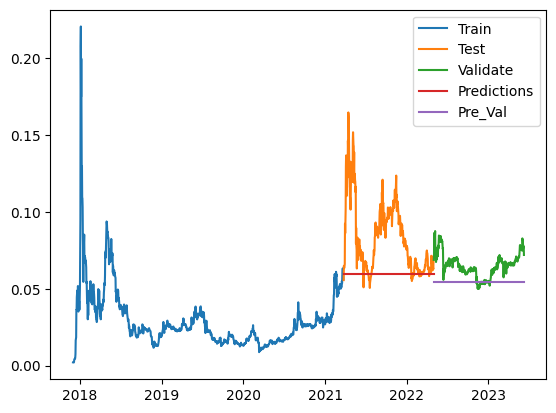

In [20]:
# Vẽ đồ thị
fig, ax = plt.subplots()
ax.plot(train_data['Date'], train_data['Close'])
ax.plot(test_data['Date'], test_data['Close'])
ax.plot(val_data['Date'], val_data['Close'])
ax.plot(test_data['Date'], y_pred)
ax.plot(val_data['Date'], y_pred_val)
ax.legend(['Train', 'Test', 'Validate', 'Predictions', 'Pre_Val'])

# DOGE

In [21]:
# Đọc dữ liệu từ file CSV
df2 = pd.read_csv('/content/drive/MyDrive/HK6_2022-2023/IS403.N22.HTCL - Phân tích dữ liệu kinh doanh/IS403_Team15/Project/Dataset/DOGE-USD.csv')
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,0.002051,0.002237,0.001971,0.002148,0.002148,5258110
1,2017-12-02,0.002122,0.002212,0.002017,0.002149,0.002149,4978180
2,2017-12-03,0.002092,0.002340,0.002071,0.002223,0.002223,4751640
3,2017-12-04,0.002206,0.002475,0.002178,0.002463,0.002463,6307150
4,2017-12-05,0.002474,0.002676,0.002426,0.002479,0.002479,8772420
...,...,...,...,...,...,...,...
2012,2023-06-05,0.072475,0.072632,0.064828,0.066573,0.066573,506101788
2013,2023-06-06,0.066568,0.071784,0.066112,0.070373,0.070373,428926152
2014,2023-06-07,0.070371,0.070371,0.066878,0.067300,0.067300,278793457
2015,2023-06-08,0.067302,0.068426,0.067154,0.067966,0.067966,167825308


In [22]:
# Chọn các cột cần thiết
df2 = df2[['Date', 'Close']]
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.dropna() # Loại bỏ các giá trị bị thiếu
df2 = df2.reset_index(drop=True) # Đặt lại chỉ số

<ipython-input-22-057164bac5b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date'] = pd.to_datetime(df2['Date'])


## Tỉ lệ 7:2:1


In [23]:
# Tách dữ liệu thành tập huấn luyện, tập kiểm tra và tập xác thực
train_size = int(0.7 * len(df2))
test_size = int(0.2 * len(df2))
val_size = len(df2) - train_size - test_size

train_data = df2[:train_size]
test_data = df2[train_size:train_size+test_size]
val_data = df2[train_size+test_size:]

In [24]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm số láng giềng phù hợp
best_k = None
best_rmse = float('inf')

for k in range(1, 21):
    # Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)

    # Dự đoán giá trị cho tập xác thực
    x_val = np.array(val_data.index).reshape(-1, 1)
    y_val = np.array(val_data['Close'])
    y_pred_val = model.predict(x_val)

    # Tính toán RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

    # In số láng giềng và RMSE
    print(f"Number of neighbors: {k}, RMSE: {rmse}")

    # Lưu lại số láng giềng và RMSE tốt nhất
    if rmse < best_rmse:
        best_k = k
        best_rmse = rmse

        # Dự đoán giá trị cho tập kiểm tra
        x_test = np.array(test_data.index).reshape(-1, 1)
        y_test = np.array(test_data['Close'])
        y_pred = model.predict(x_test)

        # Dự đoán giá trị cho 30 ngày tiếp theo
        last_index = df.index[-1]
        last_data = pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D')
        x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
        y_next_30_days = model.predict(x_next_30_days)

# In số láng giềng và RMSE tốt nhất
print('Best k:', best_k)
print('Best RMSE:', best_rmse)

Number of neighbors: 1, RMSE: 0.15099235811521386
Number of neighbors: 2, RMSE: 0.15014479980586015
Number of neighbors: 3, RMSE: 0.1554500282645632
Number of neighbors: 4, RMSE: 0.15741767875122617
Number of neighbors: 5, RMSE: 0.15841299068912787
Number of neighbors: 6, RMSE: 0.1611086469298191
Number of neighbors: 7, RMSE: 0.16258942004114102
Number of neighbors: 8, RMSE: 0.16230654786220108
Number of neighbors: 9, RMSE: 0.15996702377209254
Number of neighbors: 10, RMSE: 0.15783438336420805
Number of neighbors: 11, RMSE: 0.15644146045225027
Number of neighbors: 12, RMSE: 0.15371941180417073
Number of neighbors: 13, RMSE: 0.15100403461696557
Number of neighbors: 14, RMSE: 0.14852895862439472
Number of neighbors: 15, RMSE: 0.14661412839225801
Number of neighbors: 16, RMSE: 0.14523193820151856
Number of neighbors: 17, RMSE: 0.14422834985083327
Number of neighbors: 18, RMSE: 0.14338126475198573
Number of neighbors: 19, RMSE: 0.14343136366252054
Number of neighbors: 20, RMSE: 0.143477750

In [25]:
# last_price = df['Close'].iloc[-1]
# print('Last Price:', last_price)

# # In kết quả dự đoán 30 ngày tiếp theo
# print('Predicted closing prices for the next 30 days:')
# for i, price in enumerate(y_next_30_days):
#     print(f"Day {i+1}: {price}")

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính toán MAE và RMSE cho tập validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Tính toán MAE và RMSE cho tập testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Tính toán MAPE cho tập validation và testing
mape_val = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# In kết quả
print('Validation MAE:', mae_val)
print('Validation RMSE:', rmse_val)
print('Validation MAPE:', mape_val)

print('Testing MAE:', mae_test)
print('Testing RMSE:', rmse_test)
print('Testing MAPE:', mape_test)


Validation MAE: 0.1432092060412973
Validation RMSE: 0.1434777504310768
Validation MAPE: 180.44044109281978
Testing MAE: 0.10621692490131525
Testing RMSE: 0.11722180931552367
Testing MAPE: 128.74273658993965


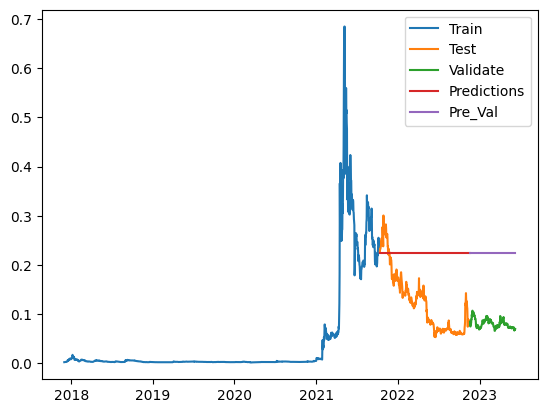

In [27]:
fig, ax = plt.subplots()
ax.plot(train_data['Date'], train_data['Close'])
ax.plot(test_data['Date'], test_data['Close'])
ax.plot(val_data['Date'], val_data['Close'])
ax.plot(test_data['Date'], y_pred)
ax.plot(val_data['Date'], y_pred_val)
ax.legend(['Train', 'Test', 'Validate', 'Predictions', 'Pre_Val'])

## Tỉ lệ 5:3:2

In [28]:
# Tách dữ liệu thành tập huấn luyện, tập kiểm tra và tập xác thực
train_size1 = int(0.5 * len(df2))
test_size1 = int(0.3 * len(df2))
val_size1 = len(df2) - train_size1 - test_size1

train_data1 = df2[:train_size1]
test_data1 = df2[train_size1:train_size1+test_size1]
val_data1 = df2[train_size1+test_size1:]

# Quá trình Training
x_train1 = np.array(train_data1.index).reshape(-1, 1)
y_train1 = np.array(train_data1['Close'])

In [29]:
# Tìm số láng giềng phù hợp
best_k1 = None
best_rmse1 = float('inf')

for k1 in range(1, 21):
    # Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k1)
    model.fit(x_train1, y_train1)

    # Dự đoán giá trị cho tập xác thực
    x_val1 = np.array(val_data1.index).reshape(-1, 1)
    y_val1 = np.array(val_data1['Close'])
    y_pred_val1 = model.predict(x_val1)

    # Tính toán RMSE
    rmse1 = np.sqrt(mean_squared_error(y_val1, y_pred_val1))

    # In số láng giềng và RMSE
    print(f"Number of neighbors: {k1}, RMSE: {rmse1}")

    # Lưu lại số láng giềng và RMSE tốt nhất
    if rmse1 < best_rmse1:
        best_k1 = k1
        best_rmse1 = rmse1

# Xây dựng mô hình KNN với số láng giềng tốt nhất
model = KNeighborsRegressor(n_neighbors=best_k1)
model.fit(x_train1, y_train1)

# Dự đoán giá trị cho tập kiểm tra
x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1['Close'])
y_pred1 = model.predict(x_test1)

# Dự đoán giá trị cho 30 ngày tiếp theo
last_index1 = df.index[-1]
last_data1 = pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D')
x_next1_30_days = np.array(range(last_index1+1, last_index1+31)).reshape(-1, 1)
y_next1_30_days = model.predict(x_next1_30_days)

# In số láng giềng và RMSE tốt nhất
print('Best k:', best_k1)
print('Best RMSE:', best_rmse1)

Number of neighbors: 1, RMSE: 0.07628825502274464
Number of neighbors: 2, RMSE: 0.07613133549284684
Number of neighbors: 3, RMSE: 0.07603522860717735
Number of neighbors: 4, RMSE: 0.07599575754119405
Number of neighbors: 5, RMSE: 0.07595658150288777
Number of neighbors: 6, RMSE: 0.07593340638900237
Number of neighbors: 7, RMSE: 0.0759188141179636
Number of neighbors: 8, RMSE: 0.07591583731665441
Number of neighbors: 9, RMSE: 0.07590262655785746
Number of neighbors: 10, RMSE: 0.07589186189880494
Number of neighbors: 11, RMSE: 0.07587298130889655
Number of neighbors: 12, RMSE: 0.0758575744852951
Number of neighbors: 13, RMSE: 0.07584242606946819
Number of neighbors: 14, RMSE: 0.07583287373532055
Number of neighbors: 15, RMSE: 0.07582028067298215
Number of neighbors: 16, RMSE: 0.07581140674834527
Number of neighbors: 17, RMSE: 0.07579838577485692
Number of neighbors: 18, RMSE: 0.07578261716398837
Number of neighbors: 19, RMSE: 0.0757719661456557
Number of neighbors: 20, RMSE: 0.0757616448

In [30]:
# # In kết quả dự đoán 30 ngày tiếp theo
# print('Predicted closing prices for the next 30 days:')
# for i1, price1 in enumerate(y_next_30_days):
#     print(f"Day {i1+1}: {price1}")

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính toán MAE và RMSE cho tập validation
mae_val1 = mean_absolute_error(y_val1, y_pred_val1)
rmse_val1 = np.sqrt(mean_squared_error(y_val1, y_pred_val1))

# Tính toán MAE và RMSE cho tập testing
mae_test1 = mean_absolute_error(y_test1, y_pred1)
rmse_test1 = np.sqrt(mean_squared_error(y_test1, y_pred1))

# Tính toán MAPE cho tập validation và testing
mape_val1 = np.mean(np.abs((y_val1 - y_pred_val1) / y_val1)) * 100
mape_test1 = np.mean(np.abs((y_test1 - y_pred1) / y_test1)) * 100

# In kết quả
print('Validation MAE:', mae_val1)
print('Validation RMSE:', rmse_val1)
print('Validation MAPE:', mape_val1)

print('Testing MAE:', mae_test1)
print('Testing RMSE:', rmse_test1)
print('Testing MAPE:', mape_test1)


Validation MAE: 0.07428550742391388
Validation RMSE: 0.07576164489916774
Validation MAPE: 95.5612122172519
Testing MAE: 0.14919020998168525
Testing RMSE: 0.19486049860377916
Testing MAPE: 80.67473803487816


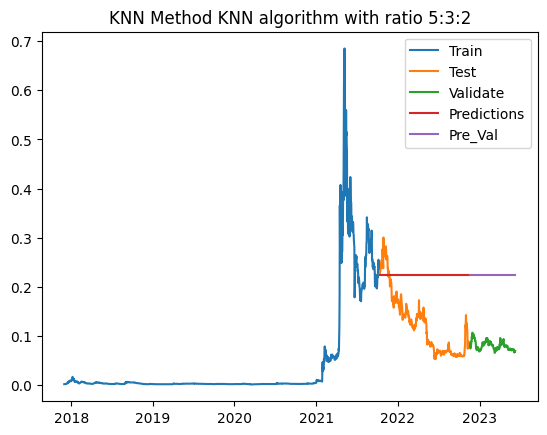

In [32]:
fig, ax = plt.subplots()
ax.plot(train_data['Date'], train_data['Close'])
ax.plot(test_data['Date'], test_data['Close'])
ax.plot(val_data['Date'], val_data['Close'])
ax.plot(test_data['Date'], y_pred)
ax.plot(val_data['Date'], y_pred_val)
ax.legend(['Train', 'Test', 'Validate', 'Predictions', 'Pre_Val'])
ax.set_title('KNN Method KNN algorithm with ratio 5:3:2')
plt.show()

## Tỉ lệ 6:2:2

In [33]:
# Tách dữ liệu thành tập huấn luyện, tập kiểm tra và tập xác thực
train_size = int(0.6 * len(df2))
test_size = int(0.2 * len(df2))
val_size = len(df2) - train_size - test_size

train_data = df2[:train_size]
test_data = df2[train_size:train_size+test_size]
val_data = df2[train_size+test_size:]

In [34]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm số láng giềng phù hợp
best_k = None
best_rmse = float('inf')

for k in range(1, 21):
    # Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)

    # Dự đoán giá trị cho tập xác thực
    x_val = np.array(val_data.index).reshape(-1, 1)
    y_val = np.array(val_data['Close'])
    y_pred_val = model.predict(x_val)

    # Tính toán RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

    # In số láng giềng và RMSE
    print(f"Number of neighbors: {k}, RMSE: {rmse}")

    # Lưu lại số láng giềng và RMSE tốt nhất
    if rmse < best_rmse:
        best_k = k
        best_rmse = rmse

        # Dự đoán giá trị cho tập kiểm tra
        x_test = np.array(test_data.index).reshape(-1, 1)
        y_test = np.array(test_data['Close'])
        y_pred = model.predict(x_test)

        # Dự đoán giá trị cho 30 ngày tiếp theo
        last_index = df.index[-1]
        last_data = pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D')
        x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
        y_next_30_days = model.predict(x_next_30_days)

# In số láng giềng và RMSE tốt nhất
print('Best k:', best_k)
print('Best RMSE:', best_rmse)

Number of neighbors: 1, RMSE: 0.029890911751200684
Number of neighbors: 2, RMSE: 0.02909064518294636
Number of neighbors: 3, RMSE: 0.028425235638631804
Number of neighbors: 4, RMSE: 0.027614573611651285
Number of neighbors: 5, RMSE: 0.0268446114565049
Number of neighbors: 6, RMSE: 0.02642374123107393
Number of neighbors: 7, RMSE: 0.02623607018769903
Number of neighbors: 8, RMSE: 0.02606801672861747
Number of neighbors: 9, RMSE: 0.02585092548570078
Number of neighbors: 10, RMSE: 0.02580183487021556
Number of neighbors: 11, RMSE: 0.02565022252839731
Number of neighbors: 12, RMSE: 0.025264940194558865
Number of neighbors: 13, RMSE: 0.025380647207876632
Number of neighbors: 14, RMSE: 0.025447066886171415
Number of neighbors: 15, RMSE: 0.025500047916214966
Number of neighbors: 16, RMSE: 0.025445263525029148
Number of neighbors: 17, RMSE: 0.025209016850777366
Number of neighbors: 18, RMSE: 0.025440751873024466
Number of neighbors: 19, RMSE: 0.025697834665307825
Number of neighbors: 20, RMSE:

In [35]:
# last_price = df['Close'].iloc[-1]
# print('Last Price:', last_price)

# # In kết quả dự đoán 30 ngày tiếp theo
# print('Predicted closing prices for the next 30 days:')
# for i, price in enumerate(y_next_30_days):
#     print(f"Day {i+1}: {price}")

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính toán MAE và RMSE cho tập validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Tính toán MAE và RMSE cho tập testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Tính toán MAPE cho tập validation và testing
mape_val = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# In kết quả
print('Validation MAE:', mae_val)
print('Validation RMSE:', rmse_val)
print('Validation MAPE:', mape_val)

print('Testing MAE:', mae_test)
print('Testing RMSE:', rmse_test)
print('Testing MAPE:', mape_test)


Validation MAE: 0.02134123567012278
Validation RMSE: 0.02598665466508654
Validation MAPE: 25.19853112529951
Testing MAE: 0.16251819535008905
Testing RMSE: 0.1902563448624374
Testing MAPE: 68.07582552455845


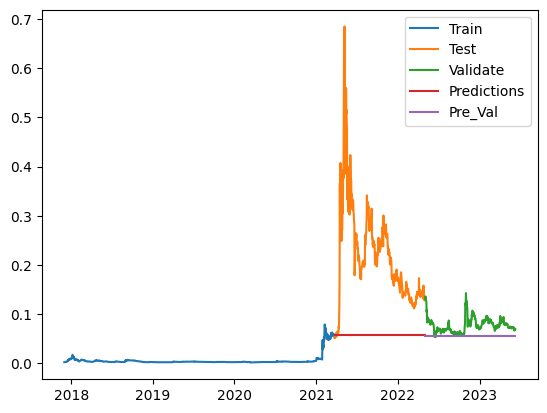

In [37]:
fig, ax = plt.subplots()
ax.plot(train_data['Date'], train_data['Close'])
ax.plot(test_data['Date'], test_data['Close'])
ax.plot(val_data['Date'], val_data['Close'])
ax.plot(test_data['Date'], y_pred)
ax.plot(val_data['Date'], y_pred_val)
ax.legend(['Train', 'Test', 'Validate', 'Predictions', 'Pre_Val'])

# XLM-USD


In [40]:
# Đọc dữ liệu từ file CSV
df3 = pd.read_csv('/content/drive/MyDrive/HK6_2022-2023/IS403.N22.HTCL - Phân tích dữ liệu kinh doanh/IS403_Team15/Project/Dataset/XLM-USD.csv')
df3

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,0.072181,0.091459,0.071534,0.089883,0.089883,102074000
1,2017-12-02,0.090184,0.098519,0.089947,0.093816,0.093816,82791104
2,2017-12-03,0.093531,0.096906,0.086840,0.089035,0.089035,55809800
3,2017-12-04,0.089487,0.097610,0.087554,0.097610,0.097610,37476600
4,2017-12-05,0.097240,0.127591,0.093964,0.123523,0.123523,152740992
...,...,...,...,...,...,...,...
2012,2023-06-05,0.091392,0.091751,0.086097,0.087906,0.087906,63121745
2013,2023-06-06,0.087900,0.089748,0.086797,0.089685,0.089685,46764076
2014,2023-06-07,0.089678,0.089868,0.086942,0.087353,0.087353,43941794
2015,2023-06-08,0.087363,0.087898,0.086805,0.087150,0.087150,34844133


In [41]:
# Chọn các cột cần thiết
df3 = df3[['Date', 'Close']]
df3['Date'] = pd.to_datetime(df3['Date'])
df3 = df3.dropna() # Loại bỏ các giá trị bị thiếu
df3 = df3.reset_index(drop=True) # Đặt lại chỉ số

<ipython-input-41-fb7dd3efecc0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Date'] = pd.to_datetime(df3['Date'])


## Tỉ lệ 7:2:1


In [42]:
# Tách dữ liệu thành tập huấn luyện, tập kiểm tra và tập xác thực
train_size = int(0.7 * len(df3))
test_size = int(0.2 * len(df3))
val_size = len(df3) - train_size - test_size

train_data = df3[:train_size]
test_data = df3[train_size:train_size+test_size]
val_data = df3[train_size+test_size:]

In [43]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm số láng giềng phù hợp
best_k = None
best_rmse = float('inf')

for k in range(1, 21):
    # Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)

    # Dự đoán giá trị cho tập xác thực
    x_val = np.array(val_data.index).reshape(-1, 1)
    y_val = np.array(val_data['Close'])
    y_pred_val = model.predict(x_val)

    # Tính toán RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

    # In số láng giềng và RMSE
    print(f"Number of neighbors: {k}, RMSE: {rmse}")

    # Lưu lại số láng giềng và RMSE tốt nhất
    if rmse < best_rmse:
        best_k = k
        best_rmse = rmse

        # Dự đoán giá trị cho tập kiểm tra
        x_test = np.array(test_data.index).reshape(-1, 1)
        y_test = np.array(test_data['Close'])
        y_pred = model.predict(x_test)

        # Dự đoán giá trị cho 30 ngày tiếp theo
        last_index = df.index[-1]
        last_data = pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D')
        x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
        y_next_30_days = model.predict(x_next_30_days)

# In số láng giềng và RMSE tốt nhất
print('Best k:', best_k)
print('Best RMSE:', best_rmse)

Number of neighbors: 1, RMSE: 0.2558350970502625
Number of neighbors: 2, RMSE: 0.24981884233049864
Number of neighbors: 3, RMSE: 0.2545937528173387
Number of neighbors: 4, RMSE: 0.2527192582245547
Number of neighbors: 5, RMSE: 0.2532526706287053
Number of neighbors: 6, RMSE: 0.2553298619077
Number of neighbors: 7, RMSE: 0.2517651306562651
Number of neighbors: 8, RMSE: 0.24791365415764904
Number of neighbors: 9, RMSE: 0.2455224267843992
Number of neighbors: 10, RMSE: 0.24379715433327814
Number of neighbors: 11, RMSE: 0.2408788317037885
Number of neighbors: 12, RMSE: 0.23664969564753774
Number of neighbors: 13, RMSE: 0.23241345516368658
Number of neighbors: 14, RMSE: 0.22781782456720817
Number of neighbors: 15, RMSE: 0.2244408946776456
Number of neighbors: 16, RMSE: 0.22213137321324367
Number of neighbors: 17, RMSE: 0.2201766457978867
Number of neighbors: 18, RMSE: 0.21867029791583
Number of neighbors: 19, RMSE: 0.21845217703611527
Number of neighbors: 20, RMSE: 0.21776047856749112
Best 

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính toán MAE và RMSE cho tập validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Tính toán MAE và RMSE cho tập testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Tính toán MAPE cho tập validation và testing
mape_val = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# In kết quả
print('Validation MAE:', mae_val)
print('Validation RMSE:', rmse_val)
print('Validation MAPE:', mape_val)

print('Testing MAE:', mae_test)
print('Testing RMSE:', rmse_test)
print('Testing MAPE:', mape_test)


Validation MAE: 0.21760209010446022
Validation RMSE: 0.21776047856749112
Validation MAPE: 247.9187189713492
Testing MAE: 0.13194421706882958
Testing RMSE: 0.14618606359984637
Testing MAPE: 98.9479986672318


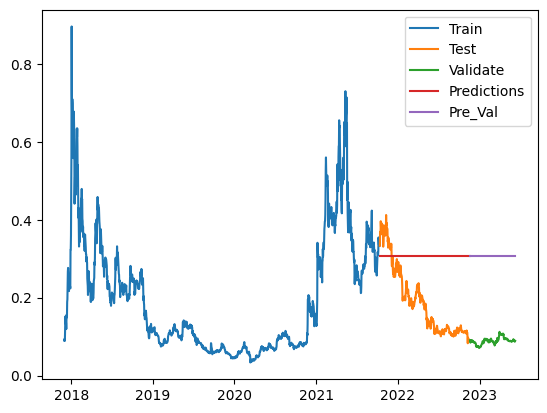

In [45]:
# Vẽ đồ thị
fig, ax = plt.subplots()
ax.plot(train_data['Date'], train_data['Close'])
ax.plot(test_data['Date'], test_data['Close'])
ax.plot(val_data['Date'], val_data['Close'])
ax.plot(test_data['Date'], y_pred)
ax.plot(val_data['Date'], y_pred_val)
ax.legend(['Train', 'Test', 'Validate', 'Predictions', 'Pre_Val'])
plt.show()

## Tỉ lệ 5:3:2

In [46]:
# Tách dữ liệu thành tập huấn luyện, tập kiểm tra và tập xác thực
train_size1 = int(0.5 * len(df3))
test_size1 = int(0.3 * len(df3))
val_size1 = len(df3) - train_size1 - test_size1

train_data1 = df3[:train_size1]
test_data1 = df3[train_size1:train_size1+test_size1]
val_data1 = df3[train_size1+test_size1:]

# Quá trình Training
x_train1 = np.array(train_data1.index).reshape(-1, 1)
y_train1 = np.array(train_data1['Close'])

In [47]:
# Tìm số láng giềng phù hợp
best_k1 = None
best_rmse1 = float('inf')

for k1 in range(1, 21):
    # Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k1)
    model.fit(x_train1, y_train1)

    # Dự đoán giá trị cho tập xác thực
    x_val1 = np.array(val_data1.index).reshape(-1, 1)
    y_val1 = np.array(val_data1['Close'])
    y_pred_val1 = model.predict(x_val1)

    # Tính toán RMSE
    rmse1 = np.sqrt(mean_squared_error(y_val1, y_pred_val1))

    # In số láng giềng và RMSE
    print(f"Number of neighbors: {k1}, RMSE: {rmse1}")

    # Lưu lại số láng giềng và RMSE tốt nhất
    if rmse1 < best_rmse1:
        best_k1 = k1
        best_rmse1 = rmse1

# Xây dựng mô hình KNN với số láng giềng tốt nhất
model = KNeighborsRegressor(n_neighbors=best_k1)
model.fit(x_train1, y_train1)

# Dự đoán giá trị cho tập kiểm tra
x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1['Close'])
y_pred1 = model.predict(x_test1)

# Dự đoán giá trị cho 30 ngày tiếp theo
last_index1 = df.index[-1]
last_data1 = pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D')
x_next1_30_days = np.array(range(last_index1+1, last_index1+31)).reshape(-1, 1)
y_next1_30_days = model.predict(x_next1_30_days)

# In số láng giềng và RMSE tốt nhất
print('Best k:', best_k1)
print('Best RMSE:', best_rmse1)

Number of neighbors: 1, RMSE: 0.030633368148999918
Number of neighbors: 2, RMSE: 0.02583180518538881
Number of neighbors: 3, RMSE: 0.023105576209457076
Number of neighbors: 4, RMSE: 0.02220730515541913
Number of neighbors: 5, RMSE: 0.021628680926220844
Number of neighbors: 6, RMSE: 0.02138095289926406
Number of neighbors: 7, RMSE: 0.02126663545818912
Number of neighbors: 8, RMSE: 0.021283171960446955
Number of neighbors: 9, RMSE: 0.021086642406205426
Number of neighbors: 10, RMSE: 0.020947761538956555
Number of neighbors: 11, RMSE: 0.020654624857378474
Number of neighbors: 12, RMSE: 0.020442141398140604
Number of neighbors: 13, RMSE: 0.020289060988612957
Number of neighbors: 14, RMSE: 0.020209271022767553
Number of neighbors: 15, RMSE: 0.020014338035282332
Number of neighbors: 16, RMSE: 0.019934392529056207
Number of neighbors: 17, RMSE: 0.01977940337076548
Number of neighbors: 18, RMSE: 0.01960384707982466
Number of neighbors: 19, RMSE: 0.01946770077261242
Number of neighbors: 20, RMS

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính toán MAE và RMSE cho tập validation
mae_val1 = mean_absolute_error(y_val1, y_pred_val1)
rmse_val1 = np.sqrt(mean_squared_error(y_val1, y_pred_val1))

# Tính toán MAE và RMSE cho tập testing
mae_test1 = mean_absolute_error(y_test1, y_pred1)
rmse_test1 = np.sqrt(mean_squared_error(y_test1, y_pred1))

# Tính toán MAPE cho tập validation và testing
mape_val1 = np.mean(np.abs((y_val1 - y_pred_val1) / y_val1)) * 100
mape_test1 = np.mean(np.abs((y_test1 - y_pred1) / y_test1)) * 100

# In kết quả
print('Validation MAE:', mae_val1)
print('Validation RMSE:', rmse_val1)
print('Validation MAPE:', mape_val1)

print('Testing MAE:', mae_test1)
print('Testing RMSE:', rmse_test1)
print('Testing MAPE:', mape_test1)


Validation MAE: 0.015553072129957156
Validation RMSE: 0.019421257923981784
Validation MAPE: 14.83541751212588
Testing MAE: 0.1880792034331186
Testing RMSE: 0.2261747656389454
Testing MAPE: 58.92680191923326


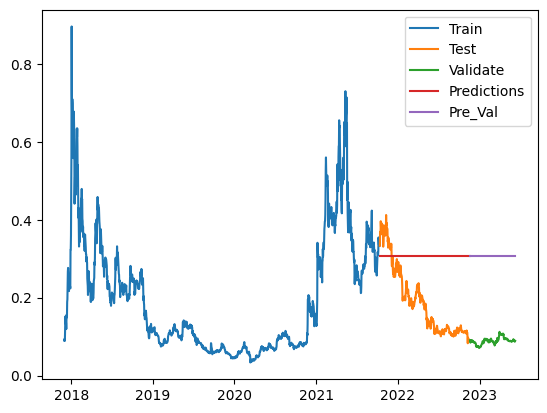

In [49]:
# Vẽ đồ thị
fig, ax = plt.subplots()
ax.plot(train_data['Date'], train_data['Close'])
ax.plot(test_data['Date'], test_data['Close'])
ax.plot(val_data['Date'], val_data['Close'])
ax.plot(test_data['Date'], y_pred)
ax.plot(val_data['Date'], y_pred_val)
ax.legend(['Train', 'Test', 'Validate', 'Predictions', 'Pre_Val'])

## Tỉ lệ 6:2:2

In [50]:
# Tách dữ liệu thành tập huấn luyện, tập kiểm tra và tập xác thực
train_size = int(0.6 * len(df3))
test_size = int(0.2 * len(df3))
val_size = len(df3) - train_size - test_size

train_data = df3[:train_size]
test_data = df3[train_size:train_size+test_size]
val_data = df3[train_size+test_size:]

In [51]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm số láng giềng phù hợp
best_k = None
best_rmse = float('inf')

for k in range(1, 21):
    # Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)

    # Dự đoán giá trị cho tập xác thực
    x_val = np.array(val_data.index).reshape(-1, 1)
    y_val = np.array(val_data['Close'])
    y_pred_val = model.predict(x_val)

    # Tính toán RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

    # In số láng giềng và RMSE
    print(f"Number of neighbors: {k}, RMSE: {rmse}")

    # Lưu lại số láng giềng và RMSE tốt nhất
    if rmse < best_rmse:
        best_k = k
        best_rmse = rmse

        # Dự đoán giá trị cho tập kiểm tra
        x_test = np.array(test_data.index).reshape(-1, 1)
        y_test = np.array(test_data['Close'])
        y_pred = model.predict(x_test)

        # Dự đoán giá trị cho 30 ngày tiếp theo
        last_index = df.index[-1]
        last_data = pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D')
        x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
        y_next_30_days = model.predict(x_next_30_days)

# In số láng giềng và RMSE tốt nhất
print('Best k:', best_k)
print('Best RMSE:', best_rmse)

Number of neighbors: 1, RMSE: 0.2660531932090293
Number of neighbors: 2, RMSE: 0.2817378066803626
Number of neighbors: 3, RMSE: 0.2858541448708812
Number of neighbors: 4, RMSE: 0.2899725817607691
Number of neighbors: 5, RMSE: 0.2949362058459728
Number of neighbors: 6, RMSE: 0.29505887960640753
Number of neighbors: 7, RMSE: 0.2950440066278954
Number of neighbors: 8, RMSE: 0.29592283413908277
Number of neighbors: 9, RMSE: 0.29560882141258865
Number of neighbors: 10, RMSE: 0.2943349964547292
Number of neighbors: 11, RMSE: 0.29384015822491294
Number of neighbors: 12, RMSE: 0.2948190607419235
Number of neighbors: 13, RMSE: 0.29408202420229324
Number of neighbors: 14, RMSE: 0.2947353114426594
Number of neighbors: 15, RMSE: 0.2956254085715267
Number of neighbors: 16, RMSE: 0.2977689446766311
Number of neighbors: 17, RMSE: 0.2987729003857328
Number of neighbors: 18, RMSE: 0.2994054110764237
Number of neighbors: 19, RMSE: 0.29947059204614346
Number of neighbors: 20, RMSE: 0.2996719602038901
Bes

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính toán MAE và RMSE cho tập validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Tính toán MAE và RMSE cho tập testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Tính toán MAPE cho tập validation và testing
mape_val = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# In kết quả
print('Validation MAE:', mae_val)
print('Validation RMSE:', rmse_val)
print('Validation MAPE:', mape_val)

print('Testing MAE:', mae_test)
print('Testing RMSE:', rmse_test)
print('Testing MAPE:', mape_test)


Validation MAE: 0.2990535314536036
Validation RMSE: 0.2996719602038901
Validation MAPE: 302.1123009537436
Testing MAE: 0.10260380279485404
Testing RMSE: 0.12495717771665717
Testing MAPE: 38.698873000442156


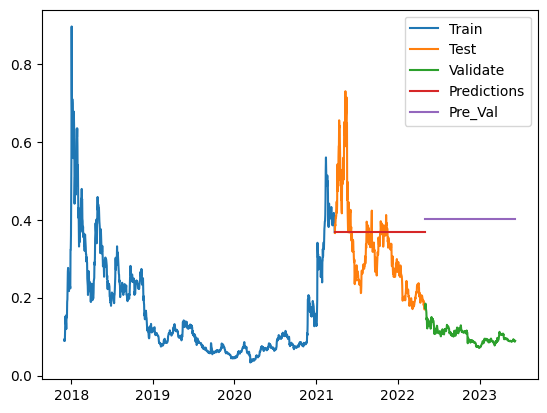

In [53]:
# Vẽ đồ thị
fig, ax = plt.subplots()
ax.plot(train_data['Date'], train_data['Close'])
ax.plot(test_data['Date'], test_data['Close'])
ax.plot(val_data['Date'], val_data['Close'])
ax.plot(test_data['Date'], y_pred)
ax.plot(val_data['Date'], y_pred_val)
ax.legend(['Train', 'Test', 'Validate', 'Predictions', 'Pre_Val'])
plt.show()